In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

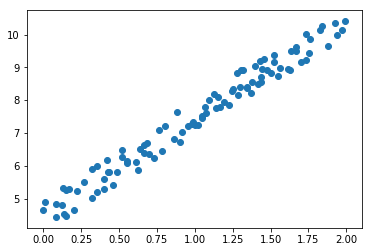

In [4]:
plt.scatter(X, y)

In [5]:
## Normal Equation

In [6]:
X_b = np.c_[np.ones(X.shape), X]
# theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# theta_best

$P_{r,c} = \sum_{k=1}^n{Q_{r,k} \times R_{k,c}}$

where;

$P$ = dot

$Q$ = X_b.T

$R$ = X_b

In [7]:
dot = np.zeros((X_b.T.shape[0], X_b.shape[1]))

for r in range(dot.shape[0]):
    for c in range(dot.shape[1]):
        sm = 0
        for k in range(X_b.shape[0]):
            sm += X_b.T[r,k] * X_b[k,c]
        dot[r, c] = sm


In [8]:
invd = np.linalg.inv(dot)

dot2 = np.zeros((invd.shape[0], X_b.T.shape[1]))

for r in range(dot2.shape[0]):
    for c in range(dot2.shape[1]):
        sm = 0
        for k in range(X_b.T.shape[0]):
            sm += invd[r,k] * X_b.T[k,c]
        dot2[r, c] = sm

theta_best = np.zeros((dot2.shape[0], y.shape[1]))

for r in range(theta_best.shape[0]):
    for c in range(theta_best.shape[1]):
        sm = 0
        for k in range(y.shape[0]):
            sm += dot2[r,k] * y[k,c]
        theta_best[r, c] = sm
        
theta_best

array([[ 4.500954 ],
       [ 2.9583957]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

# y_pred = X_new_b @ theta_best

y_pred = np.zeros((X_new_b.shape[0], theta_best.shape[1]))

for r in range(y_pred.shape[0]):
    for c in range(y_pred.shape[1]):
        sm = 0
        for k in range(theta_best.shape[0]):
            sm += X_new_b[r,k] * theta_best[k,c]
        y_pred[r, c] = sm

y_pred

array([[  4.500954 ],
       [ 10.4177454]])

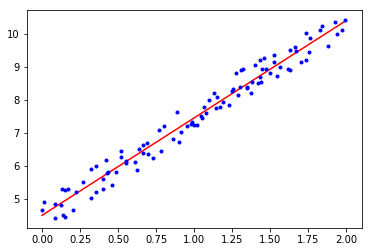

In [10]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

In [11]:
## Batch Gradient Descent

In [12]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [13]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iter):
    gradients = 2/m * X_b.T @ ((X_b @ theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 4.500954 ],
       [ 2.9583957]])

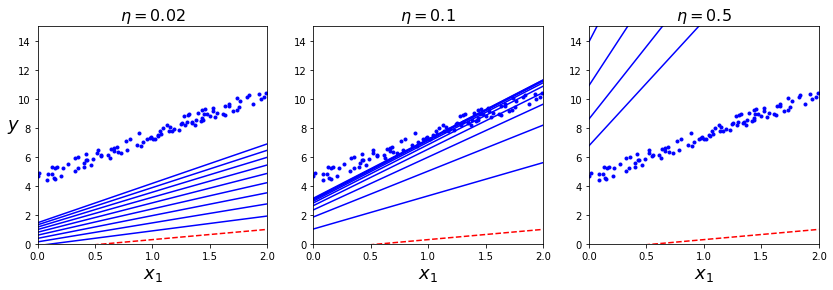

In [14]:
theta_path_bgd = []

np.random.seed(29)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(14,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [15]:
## Stochastic Gradient Descent

In [34]:
n_epoch = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        randi = np.random.randint(m)
        xi = X_b[randi:randi+1]
        yi = y[randi:randi+1]
        gradients = xi.T @ ((xi @ theta) - yi) # what is this calculation?
#         gradients = (xi @ theta) - yi
        print(f'grad: {gradients}')
        print(f'yi:   {yi}')
        print(f'pred: {xi @ theta}')
        print(f'diff: {yi - (xi @ theta)}\n')
        eta = learning_schedule(epoch * m + i)
        print(f'{theta} - {eta} * {gradients}\n')
        theta = theta - eta * gradients

theta

grad: [[-10.68751839]
 [-19.66108175]]
yi:   [[ 10.26172312]]
pred: [[-0.42579528]]
diff: [[ 10.68751839]]

[[ 0.02114362]
 [-0.2429504 ]] - 0.1 * [[-10.68751839]
 [-19.66108175]]

grad: [[-5.57204728]
 [-7.27546917]]
yi:   [[ 8.91188439]]
pred: [[ 3.33983712]]
diff: [[ 5.57204728]]

[[ 1.08989546]
 [ 1.72315777]] - 0.09803921568627451 * [[-5.57204728]
 [-7.27546917]]

grad: [[-3.60710232]
 [-4.49186654]]
yi:   [[ 8.27733534]]
pred: [[ 4.67023301]]
diff: [[ 3.60710232]]

[[ 1.63617461]
 [ 2.43643906]] - 0.09615384615384616 * [[-3.60710232]
 [-4.49186654]]

grad: [[-2.34204694]
 [-2.38394452]]
yi:   [[ 7.24472038]]
pred: [[ 4.90267343]]
diff: [[ 2.34204694]]

[[ 1.98301137]
 [ 2.86834931]] - 0.09433962264150944 * [[-2.34204694]
 [-2.38394452]]

grad: [[-2.17364135]
 [-1.19564426]]
yi:   [[ 6.07908929]]
pred: [[ 3.90544794]]
diff: [[ 2.17364135]]

[[ 2.2039592 ]
 [ 3.09324974]] - 0.09259259259259259 * [[-2.17364135]
 [-1.19564426]]

grad: [[-1.73833647]
 [-1.70096233]]
yi:   [[ 7.2786313


[[ 4.02064931]
 [ 3.38817072]] - 0.02074688796680498 * [[-0.44990029]
 [-0.09912464]]

grad: [[ 0.02714043]
 [ 0.02675533]]
yi:   [[ 7.34496629]]
pred: [[ 7.37210672]]
diff: [[-0.02714043]]

[[ 4.02998334]
 [ 3.39022724]] - 0.02066115702479339 * [[ 0.02714043]
 [ 0.02675533]]

grad: [[-0.32830048]
 [-0.13970285]]
yi:   [[ 5.80014302]]
pred: [[ 5.47184254]]
diff: [[ 0.32830048]]

[[ 4.02942259]
 [ 3.38967445]] - 0.0205761316872428 * [[-0.32830048]
 [-0.13970285]]

grad: [[-0.33863008]
 [-0.38199608]]
yi:   [[ 8.20181695]]
pred: [[ 7.86318687]]
diff: [[ 0.33863008]]

[[ 4.03617774]
 [ 3.39254899]] - 0.020491803278688523 * [[-0.33863008]
 [-0.38199608]]

grad: [[-0.3228607 ]
 [-0.36420723]]
yi:   [[ 8.20181695]]
pred: [[ 7.87895625]]
diff: [[ 0.3228607]]

[[ 4.04311688]
 [ 3.40037678]] - 0.02040816326530612 * [[-0.3228607 ]
 [-0.36420723]]

grad: [[ 0.18943831]
 [ 0.33408916]]
yi:   [[ 9.8702042]]
pred: [[ 10.05964251]]
diff: [[-0.18943831]]

[[ 4.04970588]
 [ 3.40780958]] - 0.0203252032

[[ 4.15883285]
 [ 3.25809801]] - 0.014245014245014245 * [[ 0.47062099]
 [ 0.75962309]]

grad: [[ 0.02204556]
 [ 0.02302647]]
yi:   [[ 7.52184798]]
pred: [[ 7.54389353]]
diff: [[-0.02204556]]

[[ 4.15212885]
 [ 3.24727717]] - 0.014204545454545454 * [[ 0.02204556]
 [ 0.02302647]]

grad: [[ 0.15735338]
 [ 0.06319472]]
yi:   [[ 5.29847058]]
pred: [[ 5.45582395]]
diff: [[-0.15735338]]

[[ 4.1518157 ]
 [ 3.24695009]] - 0.014164305949008499 * [[ 0.15735338]
 [ 0.06319472]]

grad: [[ 0.38856539]
 [ 0.68070821]]
yi:   [[ 9.44762231]]
pred: [[ 9.83618771]]
diff: [[-0.38856539]]

[[ 4.1495869 ]
 [ 3.24605498]] - 0.014124293785310734 * [[ 0.38856539]
 [ 0.68070821]]

grad: [[-0.08577512]
 [-0.13998104]]
yi:   [[ 9.51159507]]
pred: [[ 9.42581995]]
diff: [[ 0.08577512]]

[[ 4.14409869]
 [ 3.23644046]] - 0.014084507042253521 * [[-0.08577512]
 [-0.13998104]]

grad: [[ 0.03546175]
 [ 0.03469932]]
yi:   [[ 7.27863138]]
pred: [[ 7.31409313]]
diff: [[-0.03546175]]

[[ 4.14530679]
 [ 3.23841202]] - 0.01404

diff: [[-0.25930405]]

[[ 4.25223231]
 [ 3.24120664]] - 0.010660980810234541 * [[ 0.25930405]
 [ 0.33349116]]

grad: [[-0.16551474]
 [-0.28697928]]
yi:   [[ 10.02861451]]
pred: [[ 9.86309977]]
diff: [[ 0.16551474]]

[[ 4.24946787]
 [ 3.2376513 ]] - 0.010638297872340425 * [[-0.16551474]
 [-0.28697928]]

grad: [[-0.5156744 ]
 [-0.07894423]]
yi:   [[ 5.26302021]]
pred: [[ 4.74734581]]
diff: [[ 0.5156744]]

[[ 4.25122867]
 [ 3.24070427]] - 0.010615711252653927 * [[-0.5156744 ]
 [-0.07894423]]

grad: [[-0.19848853]
 [-0.13652626]]
yi:   [[ 6.68481988]]
pred: [[ 6.48633135]]
diff: [[ 0.19848853]]

[[ 4.25670292]
 [ 3.24154232]] - 0.01059322033898305 * [[-0.19848853]
 [-0.13652626]]

grad: [[ 0.61136823]
 [ 1.0393653 ]]
yi:   [[ 9.1607264]]
pred: [[ 9.77209464]]
diff: [[-0.61136823]]

[[ 4.25880555]
 [ 3.24298857]] - 0.010570824524312896 * [[ 0.61136823]
 [ 1.0393653 ]]

grad: [[-0.57663102]
 [-0.24191985]]
yi:   [[ 6.18492828]]
pred: [[ 5.60829726]]
diff: [[ 0.57663102]]

[[ 4.25234288]
 [ 3

 [-0.06405038]]
yi:   [[ 6.15543593]]
pred: [[ 6.03968705]]
diff: [[ 0.11574888]]

[[ 4.28780782]
 [ 3.16591519]] - 0.008291873963515755 * [[-0.11574888]
 [-0.06405038]]

grad: [[-0.06540226]
 [-0.11945585]]
yi:   [[ 10.13761735]]
pred: [[ 10.07221509]]
diff: [[ 0.06540226]]

[[ 4.2887676 ]
 [ 3.16644628]] - 0.008278145695364239 * [[-0.06540226]
 [-0.11945585]]

grad: [[-0.13723343]
 [-0.01670528]]
yi:   [[ 4.81211087]]
pred: [[ 4.67487744]]
diff: [[ 0.13723343]]

[[ 4.28930901]
 [ 3.16743516]] - 0.008264462809917356 * [[-0.13723343]
 [-0.01670528]]

grad: [[ 0.29827753]
 [ 0.42830294]]
yi:   [[ 8.54055026]]
pred: [[ 8.83882779]]
diff: [[-0.29827753]]

[[ 4.29044317]
 [ 3.16757322]] - 0.00825082508250825 * [[ 0.29827753]
 [ 0.42830294]]

grad: [[ 0.20899994]
 [ 0.24437356]]
yi:   [[ 7.77854102]]
pred: [[ 7.98754096]]
diff: [[-0.20899994]]

[[ 4.28798213]
 [ 3.16403936]] - 0.008237232289950576 * [[ 0.20899994]
 [ 0.24437356]]

grad: [[-0.37884722]
 [-0.55140309]]
yi:   [[ 9.26736178]]
p

pred: [[ 7.36023241]]
diff: [[-0.08160103]]

[[ 4.28926248]
 [ 3.13844636]] - 0.006868131868131868 * [[ 0.08160103]
 [ 0.07984661]]

grad: [[ 0.08050398]
 [ 0.07877315]]
yi:   [[ 7.27863138]]
pred: [[ 7.35913536]]
diff: [[-0.08050398]]

[[ 4.28870204]
 [ 3.13789796]] - 0.006858710562414266 * [[ 0.08050398]
 [ 0.07877315]]

grad: [[ 0.39956191]
 [ 0.61810226]]
yi:   [[ 8.74192311]]
pred: [[ 9.14148502]]
diff: [[-0.39956191]]

[[ 4.28814988]
 [ 3.13735768]] - 0.00684931506849315 * [[ 0.39956191]
 [ 0.61810226]]

grad: [[-0.58504383]
 [-0.24544937]]
yi:   [[ 6.18492828]]
pred: [[ 5.59988445]]
diff: [[ 0.58504383]]

[[ 4.28541316]
 [ 3.1331241 ]] - 0.006839945280437756 * [[-0.58504383]
 [-0.24544937]]

grad: [[ 0.11516062]
 [ 0.12095616]]
yi:   [[ 7.46681821]]
pred: [[ 7.58197883]]
diff: [[-0.11516062]]

[[ 4.28941483]
 [ 3.13480296]] - 0.006830601092896175 * [[ 0.11516062]
 [ 0.12095616]]

grad: [[-0.53119627]
 [-0.69358746]]
yi:   [[ 8.91188439]]
pred: [[ 8.38068812]]
diff: [[ 0.53119627

yi:   [[ 9.16486475]]
pred: [[ 9.0655363]]
diff: [[ 0.09932845]]

[[ 4.31495725]
 [ 3.1130658 ]] - 0.005753739930955121 * [[-0.09932845]
 [-0.1515765 ]]

grad: [[-0.3735699]
 [-0.4214104]]
yi:   [[ 8.20181695]]
pred: [[ 7.82824705]]
diff: [[ 0.3735699]]

[[ 4.31552876]
 [ 3.11393794]] - 0.005747126436781609 * [[-0.3735699]
 [-0.4214104]]

grad: [[-0.00596545]
 [-0.00395845]]
yi:   [[ 6.39154506]]
pred: [[ 6.38557961]]
diff: [[ 0.00596545]]

[[ 4.31767571]
 [ 3.11635984]] - 0.0057405281285878304 * [[-0.00596545]
 [-0.00395845]]

grad: [[ 0.1966538 ]
 [ 0.30755704]]
yi:   [[ 8.99492787]]
pred: [[ 9.19158167]]
diff: [[-0.1966538]]

[[ 4.31770996]
 [ 3.11638256]] - 0.005733944954128441 * [[ 0.1966538 ]
 [ 0.30755704]]

grad: [[ 0.12112847]
 [ 0.12722434]]
yi:   [[ 7.46681821]]
pred: [[ 7.58794668]]
diff: [[-0.12112847]]

[[ 4.31658236]
 [ 3.11461904]] - 0.0057273768613974796 * [[ 0.12112847]
 [ 0.12722434]]

grad: [[ 0.37156622]
 [ 0.50922892]]
yi:   [[ 8.21188754]]
pred: [[ 8.58345376]]
d

[[ 4.35409387]
 [ 3.11940045]] - 0.005060728744939271 * [[ 0.30840631]
 [ 0.12385912]]

grad: [[ 0.12946613]
 [ 0.15405504]]
yi:   [[ 7.93417515]]
pred: [[ 8.06364127]]
diff: [[-0.12946613]]

[[ 4.35253311]
 [ 3.11877364]] - 0.005055611729019211 * [[ 0.12946613]
 [ 0.15405504]]

grad: [[ 0.19377335]
 [ 0.01644996]]
yi:   [[ 4.42280056]]
pred: [[ 4.61657391]]
diff: [[-0.19377335]]

[[ 4.35187858]
 [ 3.11799479]] - 0.005050505050505051 * [[ 0.19377335]
 [ 0.01644996]]

grad: [[-0.48823016]
 [-0.25488051]]
yi:   [[ 6.46683563]]
pred: [[ 5.97860547]]
diff: [[ 0.48823016]]

[[ 4.35089993]
 [ 3.11791171]] - 0.005045408678102927 * [[-0.48823016]
 [-0.25488051]]

grad: [[-0.54076548]
 [-0.19226909]]
yi:   [[ 6.00315904]]
pred: [[ 5.46239356]]
diff: [[ 0.54076548]]

[[ 4.35336325]
 [ 3.11919769]] - 0.005040322580645161 * [[-0.54076548]
 [-0.19226909]]

grad: [[-0.51980422]
 [-0.21807873]]
yi:   [[ 6.18492828]]
pred: [[ 5.66512406]]
diff: [[ 0.51980422]]

[[ 4.35608888]
 [ 3.12016679]] - 0.00503

pred: [[ 6.34097868]]
diff: [[ 0.18109932]]

[[ 4.36322817]
 [ 3.10150177]] - 0.0045662100456621 * [[-0.18109932]
 [-0.11548253]]

grad: [[-0.27773587]
 [-0.4231266 ]]
yi:   [[ 9.36768761]]
pred: [[ 9.08995174]]
diff: [[ 0.27773587]]

[[ 4.36405511]
 [ 3.10202909]] - 0.004562043795620438 * [[-0.27773587]
 [-0.4231266 ]]

grad: [[-0.08075461]
 [-0.13178779]]
yi:   [[ 9.51159507]]
pred: [[ 9.43084046]]
diff: [[ 0.08075461]]

[[ 4.36532215]
 [ 3.10395941]] - 0.004557885141294439 * [[-0.08075461]
 [-0.13178779]]

grad: [[-0.49727631]
 [-0.63442583]]
yi:   [[ 8.82376879]]
pred: [[ 8.32649249]]
diff: [[ 0.49727631]]

[[ 4.36569022]
 [ 3.10456008]] - 0.004553734061930784 * [[-0.49727631]
 [-0.63442583]]

grad: [[ 0.05920327]
 [ 0.02875052]]
yi:   [[ 5.8178025]]
pred: [[ 5.87700578]]
diff: [[-0.05920327]]

[[ 4.36795468]
 [ 3.10744909]] - 0.004549590536851683 * [[ 0.05920327]
 [ 0.02875052]]

grad: [[ 0.28587098]
 [ 0.29098501]]
yi:   [[ 7.24472038]]
pred: [[ 7.53059136]]
diff: [[-0.28587098]]

 [ 0.11042524]]
yi:   [[ 5.29847058]]
pred: [[ 5.57342684]]
diff: [[-0.27495626]]

[[ 4.34544945]
 [ 3.05763502]] - 0.0040650406504065045 * [[ 0.27495626]
 [ 0.11042524]]

grad: [[ 0.37460728]
 [ 0.23462066]]
yi:   [[ 5.88447375]]
pred: [[ 6.25908102]]
diff: [[-0.37460728]]

[[ 4.34433174]
 [ 3.05718614]] - 0.004061738424045491 * [[ 0.37460728]
 [ 0.23462066]]

grad: [[ 0.35731942]
 [ 0.32131545]]
yi:   [[ 6.73377398]]
pred: [[ 7.09109339]]
diff: [[-0.35731942]]

[[ 4.34281019]
 [ 3.05623317]] - 0.004058441558441558 * [[ 0.35731942]
 [ 0.32131545]]

grad: [[ 0.32521596]
 [ 0.52492677]]
yi:   [[ 8.94706465]]
pred: [[ 9.27228061]]
diff: [[-0.32521596]]

[[ 4.34136003]
 [ 3.05492913]] - 0.0040551500405515 * [[ 0.32521596]
 [ 0.52492677]]

grad: [[-0.35843373]
 [-0.09591121]]
yi:   [[ 5.51535622]]
pred: [[ 5.1569225]]
diff: [[ 0.35843373]]

[[ 4.34004123]
 [ 3.05280047]] - 0.004051863857374392 * [[-0.35843373]
 [-0.09591121]]

grad: [[ 0.13289947]
 [ 0.15539295]]
yi:   [[ 7.77854102]]
pred


grad: [[ 0.04261228]
 [ 0.06115162]]
yi:   [[ 8.69978053]]
pred: [[ 8.74239281]]
diff: [[-0.04261228]]

[[ 4.36016429]
 [ 3.05366829]] - 0.003652300949598247 * [[ 0.04261228]
 [ 0.06115162]]

grad: [[ 0.32228427]
 [ 0.06624959]]
yi:   [[ 4.66539847]]
pred: [[ 4.98768273]]
diff: [[-0.32228427]]

[[ 4.36000866]
 [ 3.05344495]] - 0.0036496350364963502 * [[ 0.32228427]
 [ 0.06624959]]

grad: [[-0.39877888]
 [-0.44984771]]
yi:   [[ 8.20181695]]
pred: [[ 7.80303808]]
diff: [[ 0.39877888]]

[[ 4.35883244]
 [ 3.05320316]] - 0.0036469730123997084 * [[-0.39877888]
 [-0.44984771]]

grad: [[-0.14284654]
 [-0.21798569]]
yi:   [[ 9.16486475]]
pred: [[ 9.0220182]]
diff: [[ 0.14284654]]

[[ 4.36028677]
 [ 3.05484375]] - 0.0036443148688046646 * [[-0.14284654]
 [-0.21798569]]

grad: [[-0.16724568]
 [-0.27844137]]
yi:   [[ 9.61527602]]
pred: [[ 9.44803034]]
diff: [[ 0.16724568]]

[[ 4.36080735]
 [ 3.05563815]] - 0.003641660597232338 * [[-0.16724568]
 [-0.27844137]]

grad: [[ 0.35456102]
 [ 0.16400617]]



grad: [[ 0.37217641]
 [ 0.0562355 ]]
yi:   [[ 4.45475291]]
pred: [[ 4.82692932]]
diff: [[-0.37217641]]

[[ 4.36661392]
 [ 3.04644801]] - 0.003304692663582287 * [[ 0.37217641]
 [ 0.0562355 ]]

grad: [[ 0.23055958]
 [ 0.08108031]]
yi:   [[ 5.20609584]]
pred: [[ 5.43665542]]
diff: [[-0.23055958]]

[[ 4.36538399]
 [ 3.04626217]] - 0.0033025099075297227 * [[ 0.23055958]
 [ 0.08108031]]

grad: [[ 0.10251128]
 [ 0.06276998]]
yi:   [[ 6.12724275]]
pred: [[ 6.22975403]]
diff: [[-0.10251128]]

[[ 4.36462257]
 [ 3.0459944 ]] - 0.0033003300330033004 * [[ 0.10251128]
 [ 0.06276998]]

grad: [[ 0.35240318]
 [ 0.16300803]]
yi:   [[ 5.42074404]]
pred: [[ 5.77314722]]
diff: [[-0.35240318]]

[[ 4.36428425]
 [ 3.04578724]] - 0.0032981530343007917 * [[ 0.35240318]
 [ 0.16300803]]

grad: [[ 0.07363439]
 [ 0.09913533]]
yi:   [[ 8.38936313]]
pred: [[ 8.46299752]]
diff: [[-0.07363439]]

[[ 4.36312197]
 [ 3.04524961]] - 0.0032959789057350032 * [[ 0.07363439]
 [ 0.09913533]]

grad: [[ 0.36821132]
 [ 0.05563638]

yi:   [[ 9.22832878]]
pred: [[ 9.61518581]]
diff: [[-0.38685703]]

[[ 4.36631613]
 [ 3.03011865]] - 0.0030525030525030525 * [[ 0.38685703]
 [ 0.67012628]]

grad: [[-0.49493838]
 [-0.72037101]]
yi:   [[ 9.26736178]]
pred: [[ 8.7724234]]
diff: [[ 0.49493838]]

[[ 4.36513525]
 [ 3.02807308]] - 0.003050640634533252 * [[-0.49493838]
 [-0.72037101]]

grad: [[ 0.30772251]
 [ 0.42173157]]
yi:   [[ 8.21188754]]
pred: [[ 8.51961005]]
diff: [[-0.30772251]]

[[ 4.36664513]
 [ 3.03027068]] - 0.003048780487804878 * [[ 0.30772251]
 [ 0.42173157]]

grad: [[ 0.12881209]
 [ 0.15061377]]
yi:   [[ 7.77854102]]
pred: [[ 7.90735311]]
diff: [[-0.12881209]]

[[ 4.36570695]
 [ 3.02898491]] - 0.0030469226081657527 * [[ 0.12881209]
 [ 0.15061377]]

grad: [[ 0.22425282]
 [ 0.07886243]]
yi:   [[ 5.20609584]]
pred: [[ 5.43034866]]
diff: [[-0.22425282]]

[[ 4.36531447]
 [ 3.028526  ]] - 0.0030450669914738123 * [[ 0.22425282]
 [ 0.07886243]]

grad: [[-0.0487033 ]
 [-0.02678999]]
yi:   [[ 6.07908929]]
pred: [[ 6.03038

diff: [[ 0.26970206]]

[[ 4.39072913]
 [ 3.04479231]] - 0.002828054298642534 * [[-0.26970206]
 [-0.49615206]]

grad: [[ 0.02129215]
 [ 0.0141287 ]]
yi:   [[ 6.39154506]]
pred: [[ 6.41283721]]
diff: [[-0.02129215]]

[[ 4.39149186]
 [ 3.04619545]] - 0.002826455624646693 * [[ 0.02129215]
 [ 0.0141287 ]]

grad: [[-0.15669354]
 [-0.16723337]]
yi:   [[ 7.79917742]]
pred: [[ 7.64248389]]
diff: [[ 0.15669354]]

[[ 4.39143168]
 [ 3.04615552]] - 0.002824858757062147 * [[-0.15669354]
 [-0.16723337]]

grad: [[-0.37315427]
 [-0.42094154]]
yi:   [[ 8.20181695]]
pred: [[ 7.82866268]]
diff: [[ 0.37315427]]

[[ 4.39187432]
 [ 3.04662793]] - 0.00282326369282891 * [[-0.37315427]
 [-0.42094154]]

grad: [[ 0.21378959]
 [ 0.30341056]]
yi:   [[ 8.50460457]]
pred: [[ 8.71839416]]
diff: [[-0.21378959]]

[[ 4.39292783]
 [ 3.04781636]] - 0.0028216704288939053 * [[ 0.21378959]
 [ 0.30341056]]

grad: [[-0.35955602]
 [-0.27526725]]
yi:   [[ 7.08455847]]
pred: [[ 6.72500245]]
diff: [[ 0.35955602]]

[[ 4.39232459]
 [

pred: [[ 6.53831233]]
diff: [[-0.17959912]]

[[ 4.41401706]
 [ 3.04920913]] - 0.0025853154084798345 * [[ 0.17959912]
 [ 0.12512148]]

grad: [[ 0.38765398]
 [ 0.62570715]]
yi:   [[ 8.94706465]]
pred: [[ 9.33471863]]
diff: [[-0.38765398]]

[[ 4.41355274]
 [ 3.04888565]] - 0.002583979328165375 * [[ 0.38765398]
 [ 0.62570715]]

grad: [[ 0.14040679]
 [ 0.16011505]]
yi:   [[ 7.74714435]]
pred: [[ 7.88755113]]
diff: [[-0.14040679]]

[[ 4.41255105]
 [ 3.04726884]] - 0.0025826446280991736 * [[ 0.14040679]
 [ 0.16011505]]

grad: [[-0.38439084]
 [-0.05884612]]
yi:   [[ 5.26302021]]
pred: [[ 4.87862938]]
diff: [[ 0.38439084]]

[[ 4.41218843]
 [ 3.04685532]] - 0.002581311306143521 * [[-0.38439084]
 [-0.05884612]]

grad: [[-0.36853785]
 [-0.06284186]]
yi:   [[ 5.30128417]]
pred: [[ 4.93274632]]
diff: [[ 0.36853785]]

[[ 4.41318066]
 [ 3.04700722]] - 0.0025799793601651187 * [[-0.36853785]
 [-0.06284186]]

grad: [[ 0.34040877]
 [ 0.26603257]]
yi:   [[ 6.45511346]]
pred: [[ 6.79552223]]
diff: [[-0.3404

[[ 4.41970381]
 [ 3.03951107]] - 0.0024449877750611247 * [[ 0.10232027]
 [ 0.1217535 ]]

grad: [[ 0.37520714]
 [ 0.12107783]]
yi:   [[ 5.02498837]]
pred: [[ 5.40019551]]
diff: [[-0.37520714]]

[[ 4.41945364]
 [ 3.03921338]] - 0.0024437927663734115 * [[ 0.37520714]
 [ 0.12107783]]

grad: [[-0.13735395]
 [-0.2286757 ]]
yi:   [[ 9.61527602]]
pred: [[ 9.47792207]]
diff: [[ 0.13735395]]

[[ 4.41853671]
 [ 3.03891749]] - 0.002442598925256473 * [[-0.13735395]
 [-0.2286757 ]]

grad: [[ 0.28860481]
 [ 0.5692049 ]]
yi:   [[ 10.12491687]]
pred: [[ 10.41352168]]
diff: [[-0.28860481]]

[[ 4.41887221]
 [ 3.03947606]] - 0.00244140625 * [[ 0.28860481]
 [ 0.5692049 ]]

grad: [[-0.49216151]
 [-0.20648151]]
yi:   [[ 6.18492828]]
pred: [[ 5.69276677]]
diff: [[ 0.49216151]]

[[ 4.41816761]
 [ 3.0380864 ]] - 0.002440214738897023 * [[-0.49216151]
 [-0.20648151]]

grad: [[ 0.42374378]
 [ 0.06402728]]
yi:   [[ 4.45475291]]
pred: [[ 4.87849669]]
diff: [[-0.42374378]]

[[ 4.41936859]
 [ 3.03859025]] - 0.00243902

yi:   [[ 5.88447375]]
pred: [[ 6.33652435]]
diff: [[-0.45205061]]

[[ 4.42849845]
 [ 3.04645126]] - 0.0023062730627306273 * [[ 0.45205061]
 [ 0.28312426]]

grad: [[-0.32017284]
 [-0.55513467]]
yi:   [[ 10.02861451]]
pred: [[ 9.70844167]]
diff: [[ 0.32017284]]

[[ 4.42745589]
 [ 3.04579829]] - 0.002305209774089442 * [[-0.32017284]
 [-0.55513467]]

grad: [[-0.24440114]
 [-0.26762489]]
yi:   [[ 8.00921578]]
pred: [[ 7.76481464]]
diff: [[ 0.24440114]]

[[ 4.42819396]
 [ 3.047078  ]] - 0.002304147465437788 * [[-0.24440114]
 [-0.26762489]]

grad: [[-0.50372667]
 [-0.65772017]]
yi:   [[ 8.91188439]]
pred: [[ 8.40815772]]
diff: [[ 0.50372667]]

[[ 4.4287571 ]
 [ 3.04769464]] - 0.0023030861354214646 * [[-0.50372667]
 [-0.65772017]]

grad: [[-0.1412861]
 [-0.0123159]]
yi:   [[ 4.83700281]]
pred: [[ 4.6957167]]
diff: [[ 0.1412861]]

[[ 4.42991722]
 [ 3.04920943]] - 0.0023020257826887663 * [[-0.1412861]
 [-0.0123159]]

grad: [[-0.01068801]
 [-0.00130104]]
yi:   [[ 4.81211087]]
pred: [[ 4.80142286]


[[ 4.42561115]
 [ 3.04236009]] - 0.002173913043478261 * [[-0.25215016]
 [-0.27611024]]

grad: [[-0.04543525]
 [-0.02514188]]
yi:   [[ 6.15543593]]
pred: [[ 6.11000068]]
diff: [[ 0.04543525]]

[[ 4.42615931]
 [ 3.04296033]] - 0.0021729682746631897 * [[-0.04543525]
 [-0.02514188]]

grad: [[ 0.10736927]
 [ 0.10247898]]
yi:   [[ 7.22330531]]
pred: [[ 7.33067458]]
diff: [[-0.10736927]]

[[ 4.42625804]
 [ 3.04301496]] - 0.002172024326672459 * [[ 0.10736927]
 [ 0.10247898]]

grad: [[ 0.40943704]
 [ 0.29790286]]
yi:   [[ 6.23049731]]
pred: [[ 6.63993435]]
diff: [[-0.40943704]]

[[ 4.42602483]
 [ 3.04279238]] - 0.0021710811984368217 * [[ 0.40943704]
 [ 0.29790286]]

grad: [[-0.43591533]
 [-0.00574381]]
yi:   [[ 4.90113588]]
pred: [[ 4.46522055]]
diff: [[ 0.43591533]]

[[ 4.42513591]
 [ 3.04214561]] - 0.002170138888888889 * [[-0.43591533]
 [-0.00574381]]

grad: [[-0.25190063]
 [-0.275837  ]]
yi:   [[ 8.00921578]]
pred: [[ 7.75731516]]
diff: [[ 0.25190063]]

[[ 4.4260819 ]
 [ 3.04215807]] - 0.00


grad: [[-0.07903089]
 [-0.15232169]]
yi:   [[ 10.35796771]]
pred: [[ 10.27893681]]
diff: [[ 0.07903089]]

[[ 4.4305676 ]
 [ 3.03437977]] - 0.0020652622883106154 * [[-0.07903089]
 [-0.15232169]]

grad: [[ 0.14424705]
 [ 0.16449435]]
yi:   [[ 7.74714435]]
pred: [[ 7.89139139]]
diff: [[-0.14424705]]

[[ 4.43073082]
 [ 3.03469436]] - 0.002064409578860446 * [[ 0.14424705]
 [ 0.16449435]]

grad: [[ 0.1513497 ]
 [ 0.20347225]]
yi:   [[ 8.35842399]]
pred: [[ 8.50977369]]
diff: [[-0.1513497]]

[[ 4.43043303]
 [ 3.03435477]] - 0.0020635575732562937 * [[ 0.1513497 ]
 [ 0.20347225]]

grad: [[-0.42731334]
 [-0.61206125]]
yi:   [[ 9.20308353]]
pred: [[ 8.77577019]]
diff: [[ 0.42731334]]

[[ 4.43012071]
 [ 3.0339349 ]] - 0.0020627062706270625 * [[-0.42731334]
 [-0.61206125]]

grad: [[ 0.12798108]
 [ 0.17230329]]
yi:   [[ 8.38936313]]
pred: [[ 8.51734421]]
diff: [[-0.12798108]]

[[ 4.43100213]
 [ 3.0351974 ]] - 0.002061855670103093 * [[ 0.12798108]
 [ 0.17230329]]

grad: [[ 0.14442301]
 [ 0.164695  ]


[[ 4.43239684]
 [ 3.03159765]] - 0.00195160031225605 * [[ 0.04840943]
 [ 0.09641541]]

grad: [[ 0.10527855]
 [ 0.12527362]]
yi:   [[ 7.93417515]]
pred: [[ 8.0394537]]
diff: [[-0.10527855]]

[[ 4.43230236]
 [ 3.03140949]] - 0.0019508388607101053 * [[ 0.10527855]
 [ 0.12527362]]

grad: [[ 0.34586679]
 [ 0.27029806]]
yi:   [[ 6.45511346]]
pred: [[ 6.80098025]]
diff: [[-0.34586679]]

[[ 4.43209698]
 [ 3.0311651 ]] - 0.0019500780031201249 * [[ 0.34586679]
 [ 0.27029806]]

grad: [[ 0.14776117]
 [ 0.15519735]]
yi:   [[ 7.46681821]]
pred: [[ 7.61457938]]
diff: [[-0.14776117]]

[[ 4.43142251]
 [ 3.030638  ]] - 0.001949317738791423 * [[ 0.14776117]
 [ 0.15519735]]

grad: [[ -2.28229284e-01]
 [ -1.85488705e-04]]
yi:   [[ 4.66182661]]
pred: [[ 4.43359732]]
diff: [[ 0.22822928]]

[[ 4.43113448]
 [ 3.03033547]] - 0.0019485580670303975 * [[ -2.28229284e-01]
 [ -1.85488705e-04]]

grad: [[-0.33302865]
 [-0.25495855]]
yi:   [[ 7.08455847]]
pred: [[ 6.75152982]]
diff: [[ 0.33302865]]

[[ 4.4315792 ]
 [ 


grad: [[ 0.22143737]
 [ 0.31426431]]
yi:   [[ 8.50460457]]
pred: [[ 8.72604194]]
diff: [[-0.22143737]]

[[ 4.42913407]
 [ 3.02769345]] - 0.0018740629685157421 * [[ 0.22143737]
 [ 0.31426431]]

grad: [[-0.1397386 ]
 [-0.14913798]]
yi:   [[ 7.79917742]]
pred: [[ 7.65943882]]
diff: [[ 0.1397386]]

[[ 4.42871909]
 [ 3.0271045 ]] - 0.0018733608092918695 * [[-0.1397386 ]
 [-0.14913798]]

grad: [[ 0.09004694]
 [ 0.09687509]]
yi:   [[ 7.59588054]]
pred: [[ 7.68592748]]
diff: [[-0.09004694]]

[[ 4.42898087]
 [ 3.02738389]] - 0.0018726591760299626 * [[ 0.09004694]
 [ 0.09687509]]

grad: [[ 0.34609703]
 [ 0.1389961 ]]
yi:   [[ 5.29847058]]
pred: [[ 5.64456761]]
diff: [[-0.34609703]]

[[ 4.42881224]
 [ 3.02720248]] - 0.0018719580681392737 * [[ 0.34609703]
 [ 0.1389961 ]]

grad: [[-0.09576892]
 [-0.18458203]]
yi:   [[ 10.35796771]]
pred: [[ 10.26219879]]
diff: [[ 0.09576892]]

[[ 4.42816436]
 [ 3.02694228]] - 0.0018712574850299401 * [[-0.09576892]
 [-0.18458203]]

grad: [[ 0.30372669]
 [ 0.3731562

pred: [[ 4.85248857]]
diff: [[-0.3374766]]

[[ 4.43333643]
 [ 3.0236961 ]] - 0.0017755681818181818 * [[ 0.3374766 ]
 [ 0.04678183]]

grad: [[ 0.34858045]
 [ 0.13999346]]
yi:   [[ 5.29847058]]
pred: [[ 5.64705103]]
diff: [[-0.34858045]]

[[ 4.43273722]
 [ 3.02361304]] - 0.001774937877174299 * [[ 0.34858045]
 [ 0.13999346]]

grad: [[ 0.06815961]
 [ 0.07119237]]
yi:   [[ 7.52184798]]
pred: [[ 7.59000759]]
diff: [[-0.06815961]]

[[ 4.43211851]
 [ 3.02336456]] - 0.0017743080198722497 * [[ 0.06815961]
 [ 0.07119237]]

grad: [[-0.26808514]
 [-0.49317752]]
yi:   [[ 10.26172312]]
pred: [[ 9.99363798]]
diff: [[ 0.26808514]]

[[ 4.43199757]
 [ 3.02323824]] - 0.0017736786094359701 * [[-0.26808514]
 [-0.49317752]]

grad: [[-0.33689884]
 [-0.25792147]]
yi:   [[ 7.08455847]]
pred: [[ 6.74765963]]
diff: [[ 0.33689884]]

[[ 4.43247307]
 [ 3.02411298]] - 0.0017730496453900709 * [[-0.33689884]
 [-0.25792147]]

grad: [[ -2.26298039e-01]
 [ -1.83919126e-04]]
yi:   [[ 4.66182661]]
pred: [[ 4.43552857]]
diff

[[ 4.43874589]
 [ 3.02125347]] - 0.001697792869269949 * [[-0.47908488]
 [-0.06181644]]

grad: [[-0.09513617]
 [-0.18336249]]
yi:   [[ 10.35796771]]
pred: [[ 10.26283154]]
diff: [[ 0.09513617]]

[[ 4.43955928]
 [ 3.02135842]] - 0.0016972165648336728 * [[-0.09513617]
 [-0.18336249]]

grad: [[-0.26708434]
 [-0.07146756]]
yi:   [[ 5.51535622]]
pred: [[ 5.24827189]]
diff: [[ 0.26708434]]

[[ 4.43972074]
 [ 3.02166962]] - 0.0016966406515100101 * [[-0.26708434]
 [-0.07146756]]

grad: [[-0.26011119]
 [-0.28482775]]
yi:   [[ 8.00921578]]
pred: [[ 7.7491046]]
diff: [[ 0.26011119]]

[[ 4.44017389]
 [ 3.02179088]] - 0.0016960651289009499 * [[-0.26011119]
 [-0.28482775]]

grad: [[ 0.34743637]
 [ 0.2715247 ]]
yi:   [[ 6.45511346]]
pred: [[ 6.80254983]]
diff: [[-0.34743637]]

[[ 4.44061506]
 [ 3.02227397]] - 0.00169548999660902 * [[ 0.34743637]
 [ 0.2715247 ]]

grad: [[ 0.036552  ]
 [ 0.07279938]]
yi:   [[ 10.42191734]]
pred: [[ 10.45846935]]
diff: [[-0.036552]]

[[ 4.44002598]
 [ 3.0218136 ]] - 0.00

diff: [[-0.15576986]]

[[ 4.4361574 ]
 [ 3.01614698]] - 0.0016302575806977503 * [[ 0.15576986]
 [ 0.09538142]]

grad: [[-0.12651892]
 [-0.19306953]]
yi:   [[ 9.16486475]]
pred: [[ 9.03834582]]
diff: [[ 0.12651892]]

[[ 4.43590345]
 [ 3.01599148]] - 0.0016297262059973925 * [[-0.12651892]
 [-0.19306953]]

grad: [[ 0.3907509 ]
 [ 0.08032377]]
yi:   [[ 4.66539847]]
pred: [[ 5.05614937]]
diff: [[-0.3907509]]

[[ 4.43610965]
 [ 3.01630613]] - 0.0016291951775822744 * [[ 0.3907509 ]
 [ 0.08032377]]

grad: [[-0.20094125]
 [-0.13367897]]
yi:   [[ 6.64296696]]
pred: [[ 6.44202571]]
diff: [[ 0.20094125]]

[[ 4.43547304]
 [ 3.01617527]] - 0.0016286644951140066 * [[-0.20094125]
 [-0.13367897]]

grad: [[-0.35113845]
 [-0.05987497]]
yi:   [[ 5.30128417]]
pred: [[ 4.95014572]]
diff: [[ 0.35113845]]

[[ 4.4358003 ]
 [ 3.01639299]] - 0.0016281341582546401 * [[-0.35113845]
 [-0.05987497]]

grad: [[ 0.21277601]
 [ 0.30197209]]
yi:   [[ 8.50460457]]
pred: [[ 8.71738058]]
diff: [[-0.21277601]]

[[ 4.436372  

pred: [[ 5.40663378]]
diff: [[-0.38164541]]

[[ 4.43413416]
 [ 3.01367155]] - 0.0015787811809283233 * [[ 0.38164541]
 [ 0.12315543]]

grad: [[-0.34398285]
 [-0.26334481]]
yi:   [[ 7.08455847]]
pred: [[ 6.74057562]]
diff: [[ 0.34398285]]

[[ 4.43353162]
 [ 3.01347711]] - 0.0015782828282828283 * [[-0.34398285]
 [-0.26334481]]

grad: [[ 0.26713177]
 [ 0.02267757]]
yi:   [[ 4.42280056]]
pred: [[ 4.68993233]]
diff: [[-0.26713177]]

[[ 4.43407452]
 [ 3.01389274]] - 0.001577784790154623 * [[ 0.26713177]
 [ 0.02267757]]

grad: [[-0.35303992]
 [-0.28317674]]
yi:   [[ 7.20413685]]
pred: [[ 6.85109693]]
diff: [[ 0.35303992]]

[[ 4.43365305]
 [ 3.01385696]] - 0.0015772870662460567 * [[-0.35303992]
 [-0.28317674]]

grad: [[ 0.17547429]
 [ 0.12224783]]
yi:   [[ 6.35871321]]
pred: [[ 6.5341875]]
diff: [[-0.17547429]]

[[ 4.43420989]
 [ 3.01430361]] - 0.001576789656259855 * [[ 0.17547429]
 [ 0.12224783]]

grad: [[ 0.41056442]
 [ 0.36919542]]
yi:   [[ 6.73377398]]
pred: [[ 7.1443384]]
diff: [[-0.410564

pred: [[ 6.35220153]]
diff: [[ 0.16987647]]

[[ 4.43188036]
 [ 3.01144127]] - 0.0015202189115232593 * [[-0.16987647]
 [-0.108326  ]]

grad: [[ 0.13334554]
 [ 0.19997939]]
yi:   [[ 8.81532299]]
pred: [[ 8.94866853]]
diff: [[-0.13334554]]

[[ 4.43213861]
 [ 3.01160595]] - 0.001519756838905775 * [[ 0.13334554]
 [ 0.19997939]]

grad: [[-0.18162155]
 [-0.12492466]]
yi:   [[ 6.68481988]]
pred: [[ 6.50319833]]
diff: [[ 0.18162155]]

[[ 4.43193596]
 [ 3.01130203]] - 0.0015192950470981465 * [[-0.18162155]
 [-0.12492466]]

grad: [[ 0.04143433]
 [ 0.0166871 ]]
yi:   [[ 5.60361386]]
pred: [[ 5.64504819]]
diff: [[-0.04143433]]

[[ 4.4322119 ]
 [ 3.01149183]] - 0.0015188335358444715 * [[ 0.04143433]
 [ 0.0166871 ]]

grad: [[ 0.17477065]
 [ 0.2043509 ]]
yi:   [[ 7.77854102]]
pred: [[ 7.95331167]]
diff: [[-0.17477065]]

[[ 4.43214896]
 [ 3.01146648]] - 0.0015183723048891589 * [[ 0.17477065]
 [ 0.2043509 ]]

grad: [[ 0.00718365]
 [ 0.01430743]]
yi:   [[ 10.42191734]]
pred: [[ 10.42910099]]
diff: [[-0.0

[[ 4.4315987 ]
 [ 3.00795787]] - 0.0014714537963507945 * [[-0.17011636]
 [-0.24608158]]

grad: [[-0.5260591 ]
 [-0.69453912]]
yi:   [[ 8.92969741]]
pred: [[ 8.40363831]]
diff: [[ 0.5260591]]

[[ 4.43184902]
 [ 3.00831996]] - 0.0014710208884966167 * [[-0.5260591 ]
 [-0.69453912]]

grad: [[-0.3503761 ]
 [-0.53379294]]
yi:   [[ 9.36768761]]
pred: [[ 9.01731151]]
diff: [[ 0.3503761]]

[[ 4.43262286]
 [ 3.00934165]] - 0.0014705882352941176 * [[-0.3503761 ]
 [-0.53379294]]

grad: [[ 0.12793317]
 [ 0.1343715 ]]
yi:   [[ 7.46681821]]
pred: [[ 7.59475139]]
diff: [[-0.12793317]]

[[ 4.43313812]
 [ 3.01012663]] - 0.001470155836518671 * [[ 0.12793317]
 [ 0.1343715 ]]

grad: [[-0.45353174]
 [-0.66010464]]
yi:   [[ 9.26736178]]
pred: [[ 8.81383004]]
diff: [[ 0.45353174]]

[[ 4.43295004]
 [ 3.00992909]] - 0.0014697236919459142 * [[-0.45353174]
 [-0.66010464]]

grad: [[ 0.40559771]
 [ 0.18761376]]
yi:   [[ 5.42074404]]
pred: [[ 5.82634176]]
diff: [[-0.40559771]]

[[ 4.43361661]
 [ 3.01089926]] - 0.001

pred: [[ 9.66848787]]
diff: [[-0.44015909]]

[[ 4.44309723]
 [ 3.01656444]] - 0.0014124293785310734 * [[ 0.44015909]
 [ 0.76245783]]

grad: [[-0.47609922]
 [-0.0614312 ]]
yi:   [[ 5.30766384]]
pred: [[ 4.83156462]]
diff: [[ 0.47609922]]

[[ 4.44247554]
 [ 3.01548752]] - 0.001412030499858797 * [[-0.47609922]
 [-0.0614312 ]]

grad: [[ 0.29753145]
 [ 0.10463214]]
yi:   [[ 5.20609584]]
pred: [[ 5.50362729]]
diff: [[-0.29753145]]

[[ 4.44314781]
 [ 3.01557426]] - 0.001411631846414455 * [[ 0.29753145]
 [ 0.10463214]]

grad: [[-0.33329422]
 [-0.25516186]]
yi:   [[ 7.08455847]]
pred: [[ 6.75126425]]
diff: [[ 0.33329422]]

[[ 4.4427278 ]
 [ 3.01542656]] - 0.0014112334180073384 * [[-0.33329422]
 [-0.25516186]]

grad: [[ 0.39773263]
 [ 0.08175895]]
yi:   [[ 4.66539847]]
pred: [[ 5.06313109]]
diff: [[-0.39773263]]

[[ 4.44319816]
 [ 3.01578665]] - 0.0014108352144469526 * [[ 0.39773263]
 [ 0.08175895]]

grad: [[ 0.18485425]
 [ 0.12878257]]
yi:   [[ 6.35871321]]
pred: [[ 6.54356746]]
diff: [[-0.1848

[[ 4.44532141]
 [ 3.01679519]] - 0.001365001365001365 * [[-0.12870746]
 [-0.01121942]]

grad: [[-0.34137046]
 [-0.05820937]]
yi:   [[ 5.30128417]]
pred: [[ 4.95991371]]
diff: [[ 0.34137046]]

[[ 4.4454971 ]
 [ 3.01681051]] - 0.0013646288209606986 * [[-0.34137046]
 [-0.05820937]]

grad: [[ 0.14340016]
 [ 0.192785  ]]
yi:   [[ 8.35842399]]
pred: [[ 8.50182414]]
diff: [[-0.14340016]]

[[ 4.44596294]
 [ 3.01688994]] - 0.001364256480218281 * [[ 0.14340016]
 [ 0.192785  ]]

grad: [[-0.040399  ]
 [-0.02235504]]
yi:   [[ 6.15543593]]
pred: [[ 6.11503693]]
diff: [[ 0.040399]]

[[ 4.44576731]
 [ 3.01662693]] - 0.001363884342607747 * [[-0.040399  ]
 [-0.02235504]]

grad: [[-0.14272716]
 [-0.23292413]]
yi:   [[ 9.51159507]]
pred: [[ 9.36886791]]
diff: [[ 0.14272716]]

[[ 4.44582241]
 [ 3.01665742]] - 0.0013635124079629125 * [[-0.14272716]
 [-0.23292413]]

grad: [[-0.47961195]
 [-0.15577894]]
yi:   [[ 5.90554858]]
pred: [[ 5.42593663]]
diff: [[ 0.47961195]]

[[ 4.44601702]
 [ 3.01697502]] - 0.00136

grad: [[ 0.18293192]
 [ 0.12744335]]
yi:   [[ 6.35871321]]
pred: [[ 6.54164513]]
diff: [[-0.18293192]]

[[ 4.44328007]
 [ 3.01198898]] - 0.0013273161667109105 * [[ 0.18293192]
 [ 0.12744335]]

grad: [[-0.1701641 ]
 [-0.11704389]]
yi:   [[ 6.68481988]]
pred: [[ 6.51465578]]
diff: [[ 0.1701641]]

[[ 4.44303726]
 [ 3.01181982]] - 0.001326963906581741 * [[-0.1701641 ]
 [-0.11704389]]

grad: [[ 0.27216881]
 [ 0.47679889]]
yi:   [[ 9.44762231]]
pred: [[ 9.71979113]]
diff: [[-0.27216881]]

[[ 4.44326306]
 [ 3.01197513]] - 0.0013266118333775537 * [[ 0.27216881]
 [ 0.47679889]]

grad: [[ 0.06638624]
 [ 0.06934009]]
yi:   [[ 7.52184798]]
pred: [[ 7.58823421]]
diff: [[-0.06638624]]

[[ 4.442902  ]
 [ 3.01134261]] - 0.001326259946949602 * [[ 0.06638624]
 [ 0.06934009]]

grad: [[-0.51122489]
 [-0.67495398]]
yi:   [[ 8.92969741]]
pred: [[ 8.41847253]]
diff: [[ 0.51122489]]

[[ 4.44281395]
 [ 3.01125064]] - 0.0013259082471492973 * [[-0.51122489]
 [-0.67495398]]

grad: [[ 0.34239767]
 [ 0.26758691]]
y


grad: [[-0.42043775]
 [-0.00553987]]
yi:   [[ 4.90113588]]
pred: [[ 4.48069813]]
diff: [[ 0.42043775]]

[[ 4.44104762]
 [ 3.00919763]] - 0.0012929919834497026 * [[-0.42043775]
 [-0.00553987]]

grad: [[ 0.01776051]
 [ 0.00976944]]
yi:   [[ 6.07908929]]
pred: [[ 6.0968498]]
diff: [[-0.01776051]]

[[ 4.44159125]
 [ 3.0092048 ]] - 0.0012926577042399173 * [[ 0.01776051]
 [ 0.00976944]]

grad: [[ 0.28454846]
 [ 0.55222779]]
yi:   [[ 9.99700762]]
pred: [[ 10.28155609]]
diff: [[-0.28454846]]

[[ 4.44156829]
 [ 3.00919217]] - 0.0012923235978288964 * [[ 0.28454846]
 [ 0.55222779]]

grad: [[ 0.04920942]
 [ 0.01981841]]
yi:   [[ 5.60361386]]
pred: [[ 5.65282328]]
diff: [[-0.04920942]]

[[ 4.44120056]
 [ 3.00847851]] - 0.0012919896640826874 * [[ 0.04920942]
 [ 0.01981841]]

grad: [[-0.13361909]
 [-0.01164757]]
yi:   [[ 4.83700281]]
pred: [[ 4.70338372]]
diff: [[ 0.13361909]]

[[ 4.44113698]
 [ 3.00845291]] - 0.0012916559028674762 * [[-0.13361909]
 [-0.01164757]]

grad: [[-0.26902807]
 [-0.07198767

[[ 4.44305554]
 [ 3.01005699]] - 0.0012607160867372667 * [[-0.44324009]
 [-0.64512538]]

grad: [[-0.35847385]
 [-0.05487851]]
yi:   [[ 5.26302021]]
pred: [[ 4.90454637]]
diff: [[ 0.35847385]]

[[ 4.44361434]
 [ 3.01087031]] - 0.0012603982858583312 * [[-0.35847385]
 [-0.05487851]]

grad: [[ 0.15810211]
 [ 0.24726407]]
yi:   [[ 8.99492787]]
pred: [[ 9.15302998]]
diff: [[-0.15810211]]

[[ 4.44406616]
 [ 3.01093947]] - 0.0012600806451612903 * [[ 0.15810211]
 [ 0.24726407]]

grad: [[-0.53676295]
 [-0.47451579]]
yi:   [[ 7.64212221]]
pred: [[ 7.10535925]]
diff: [[ 0.53676295]]

[[ 4.44386694]
 [ 3.0106279 ]] - 0.0012597631645250692 * [[-0.53676295]
 [-0.47451579]]

grad: [[ 0.35951948]
 [ 0.49271895]]
yi:   [[ 8.21188754]]
pred: [[ 8.57140702]]
diff: [[-0.35951948]]

[[ 4.44454314]
 [ 3.01122568]] - 0.0012594458438287153 * [[ 0.35951948]
 [ 0.49271895]]

grad: [[ 0.27059605]
 [ 0.47404364]]
yi:   [[ 9.44762231]]
pred: [[ 9.71821836]]
diff: [[-0.27059605]]

[[ 4.44409034]
 [ 3.01060513]] - 0.


[[ 4.44603162]
 [ 3.01055737]] - 0.0012297097884899164 * [[ 0.45789493]
 [ 0.85952301]]

grad: [[-0.10851189]
 [-0.02390797]]
yi:   [[ 5.21705104]]
pred: [[ 5.10853915]]
diff: [[ 0.10851189]]

[[ 4.44546854]
 [ 3.00950041]] - 0.0012294074256208507 * [[-0.10851189]
 [-0.02390797]]

grad: [[ 0.35617944]
 [ 0.5749045 ]]
yi:   [[ 8.94706465]]
pred: [[ 9.30324409]]
diff: [[-0.35617944]]

[[ 4.44560195]
 [ 3.0095298 ]] - 0.0012291052114060963 * [[ 0.35617944]
 [ 0.5749045 ]]

grad: [[-0.15826215]
 [-0.10091984]]
yi:   [[ 6.522078]]
pred: [[ 6.36381585]]
diff: [[ 0.15826215]]

[[ 4.44516417]
 [ 3.00882319]] - 0.001228803145736053 * [[-0.15826215]
 [-0.10091984]]

grad: [[ 0.35499575]
 [ 0.57299393]]
yi:   [[ 8.94706465]]
pred: [[ 9.3020604]]
diff: [[-0.35499575]]

[[ 4.44535864]
 [ 3.0089472 ]] - 0.0012285012285012285 * [[ 0.35499575]
 [ 0.57299393]]

grad: [[-0.14366507]
 [-0.15332856]]
yi:   [[ 7.79917742]]
pred: [[ 7.65551235]]
diff: [[ 0.14366507]]

[[ 4.44492253]
 [ 3.00824327]] - 0.001


grad: [[-0.34176806]
 [-0.26164923]]
yi:   [[ 7.08455847]]
pred: [[ 6.74279041]]
diff: [[ 0.34176806]]

[[ 4.4426507 ]
 [ 3.00445868]] - 0.0011918951132300357 * [[-0.34176806]
 [-0.26164923]]

grad: [[ 0.29077678]
 [ 0.35724609]]
yi:   [[ 7.84391901]]
pred: [[ 8.13469579]]
diff: [[-0.29077678]]

[[ 4.44305805]
 [ 3.00477054]] - 0.0011916110581506197 * [[ 0.29077678]
 [ 0.35724609]]

grad: [[ 0.35081649]
 [ 0.14089148]]
yi:   [[ 5.29847058]]
pred: [[ 5.64928707]]
diff: [[-0.35081649]]

[[ 4.44271156]
 [ 3.00434484]] - 0.0011913271384322134 * [[ 0.35081649]
 [ 0.14089148]]

grad: [[ 0.15457659]
 [ 0.09465075]]
yi:   [[ 6.12724275]]
pred: [[ 6.28181934]]
diff: [[-0.15457659]]

[[ 4.44229362]
 [ 3.00417699]] - 0.0011910433539780848 * [[ 0.15457659]
 [ 0.09465075]]

grad: [[ 0.3942343 ]
 [ 0.08103983]]
yi:   [[ 4.66539847]]
pred: [[ 5.05963276]]
diff: [[-0.3942343]]

[[ 4.44210951]
 [ 3.00406426]] - 0.0011907597046915933 * [[ 0.3942343 ]
 [ 0.08103983]]

grad: [[ 0.21454994]
 [ 0.30807675]


grad: [[-0.26777641]
 [-0.29322135]]
yi:   [[ 8.00921578]]
pred: [[ 7.74143937]]
diff: [[ 0.26777641]]

[[ 4.44564387]
 [ 3.00979551]] - 0.0011534025374855825 * [[-0.26777641]
 [-0.29322135]]

grad: [[ 0.14075521]
 [ 0.14783881]]
yi:   [[ 7.46681821]]
pred: [[ 7.60757342]]
diff: [[-0.14075521]]

[[ 4.44595273]
 [ 3.01013371]] - 0.0011531365313653136 * [[ 0.14075521]
 [ 0.14783881]]

grad: [[-0.25584831]
 [-0.13294318]]
yi:   [[ 6.26566734]]
pred: [[ 6.00981904]]
diff: [[ 0.25584831]]

[[ 4.44579042]
 [ 3.00996323]] - 0.001152870647913304 * [[-0.25584831]
 [-0.13294318]]

grad: [[ 0.39945428]
 [ 0.08211286]]
yi:   [[ 4.66539847]]
pred: [[ 5.06485274]]
diff: [[-0.39945428]]

[[ 4.44608538]
 [ 3.0101165 ]] - 0.001152604887044721 * [[ 0.39945428]
 [ 0.08211286]]

grad: [[-0.08337854]
 [-0.10382995]]
yi:   [[ 8.27733534]]
pred: [[ 8.1939568]]
diff: [[ 0.08337854]]

[[ 4.44562496]
 [ 3.01002185]] - 0.00115233924867481 * [[-0.08337854]
 [-0.10382995]]

grad: [[-0.15686462]
 [-0.10002866]]
yi

pred: [[ 8.48526663]]
diff: [[-0.09590351]]

[[ 4.44101701]
 [ 3.00393254]] - 0.0011195700850873264 * [[ 0.09590351]
 [ 0.12911665]]

grad: [[-0.05616909]
 [-0.07303364]]
yi:   [[ 8.40274221]]
pred: [[ 8.34657312]]
diff: [[ 0.05616909]]

[[ 4.44090964]
 [ 3.00378798]] - 0.0011193194537721066 * [[-0.05616909]
 [-0.07303364]]

grad: [[-0.34810167]
 [-0.05935715]]
yi:   [[ 5.30128417]]
pred: [[ 4.9531825]]
diff: [[ 0.34810167]]

[[ 4.44097251]
 [ 3.00386973]] - 0.0011190689346463742 * [[-0.34810167]
 [-0.05935715]]

grad: [[ 0.41012231]
 [ 0.18970666]]
yi:   [[ 5.42074404]]
pred: [[ 5.83086635]]
diff: [[-0.41012231]]

[[ 4.44136206]
 [ 3.00393616]] - 0.0011188185276348177 * [[ 0.41012231]
 [ 0.18970666]]

grad: [[-0.48384235]
 [-0.20299128]]
yi:   [[ 6.18492828]]
pred: [[ 5.70108593]]
diff: [[ 0.48384235]]

[[ 4.44090321]
 [ 3.00372391]] - 0.0011185682326621924 * [[-0.48384235]
 [-0.20299128]]

grad: [[-0.37172647]
 [-0.41933089]]
yi:   [[ 8.20181695]]
pred: [[ 7.83009048]]
diff: [[ 0.371

pred: [[ 4.71044641]]
diff: [[ 0.1265564]]

[[ 4.44803377]
 [ 3.01035601]] - 0.0010850694444444445 * [[-0.1265564 ]
 [-0.01103192]]

grad: [[ 0.43449926]
 [ 0.75265369]]
yi:   [[ 9.22832878]]
pred: [[ 9.66282804]]
diff: [[-0.43449926]]

[[ 4.4481711 ]
 [ 3.01036798]] - 0.0010848340203948796 * [[ 0.43449926]
 [ 0.75265369]]

grad: [[-0.16938833]
 [-0.19526524]]
yi:   [[ 8.08639908]]
pred: [[ 7.91701075]]
diff: [[ 0.16938833]]

[[ 4.44769974]
 [ 3.00955148]] - 0.0010845986984815619 * [[-0.16938833]
 [-0.19526524]]

grad: [[ 0.28059014]
 [ 0.02382008]]
yi:   [[ 4.42280056]]
pred: [[ 4.70339071]]
diff: [[-0.28059014]]

[[ 4.44788346]
 [ 3.00976326]] - 0.0010843634786380394 * [[ 0.28059014]
 [ 0.02382008]]

grad: [[-0.04176379]
 [-0.0543032 ]]
yi:   [[ 8.40274221]]
pred: [[ 8.36097842]]
diff: [[ 0.04176379]]

[[ 4.44757919]
 [ 3.00973743]] - 0.0010841283607979184 * [[-0.04176379]
 [-0.0543032 ]]

grad: [[-0.25410099]
 [-0.13203524]]
yi:   [[ 6.26566734]]
pred: [[ 6.01156636]]
diff: [[ 0.254

 [-0.28654278]]
yi:   [[ 8.00921578]]
pred: [[ 7.74753839]]
diff: [[ 0.26167739]]

[[ 4.45193512]
 [ 3.00961996]] - 0.0010515247108307045 * [[-0.26167739]
 [-0.28654278]]

grad: [[-0.10976421]
 [-0.1935777 ]]
yi:   [[ 9.8702042]]
pred: [[ 9.76043999]]
diff: [[ 0.10976421]]

[[ 4.45221028]
 [ 3.00992126]] - 0.0010513036164844407 * [[-0.10976421]
 [-0.1935777 ]]

grad: [[ 0.45312616]
 [ 0.2837979 ]]
yi:   [[ 5.88447375]]
pred: [[ 6.33759991]]
diff: [[-0.45312616]]

[[ 4.45232568]
 [ 3.01012477]] - 0.0010510826150935463 * [[ 0.45312616]
 [ 0.2837979 ]]

grad: [[-0.15247385]
 [-0.25384828]]
yi:   [[ 9.61527602]]
pred: [[ 9.46280217]]
diff: [[ 0.15247385]]

[[ 4.45184941]
 [ 3.00982648]] - 0.0010508617065994115 * [[-0.15247385]
 [-0.25384828]]

grad: [[-0.43423324]
 [-0.63201612]]
yi:   [[ 9.26736178]]
pred: [[ 8.83312854]]
diff: [[ 0.43423324]]

[[ 4.45200963]
 [ 3.01009324]] - 0.0010506408909434755 * [[-0.43423324]
 [-0.63201612]]

grad: [[-0.33543388]
 [-0.05719708]]
yi:   [[ 5.30128417]

 [ 0.25083292]]
yi:   [[ 8.99492787]]
pred: [[ 9.15531193]]
diff: [[-0.16038406]]

[[ 4.45083025]
 [ 3.00807357]] - 0.0010275380189066995 * [[ 0.16038406]
 [ 0.25083292]]

grad: [[ 0.00469273]
 [ 0.00057124]]
yi:   [[ 4.81211087]]
pred: [[ 4.8168036]]
diff: [[-0.00469273]]

[[ 4.45066545]
 [ 3.00781583]] - 0.001027326895418122 * [[ 0.00469273]
 [ 0.00057124]]

grad: [[-0.11673002]
 [-0.14648833]]
yi:   [[ 8.34199669]]
pred: [[ 8.22526668]]
diff: [[ 0.11673002]]

[[ 4.45066063]
 [ 3.00781524]] - 0.001027115858668858 * [[-0.11673002]
 [-0.14648833]]

grad: [[ 0.42140468]
 [ 0.19492545]]
yi:   [[ 5.42074404]]
pred: [[ 5.84214872]]
diff: [[-0.42140468]]

[[ 4.45078053]
 [ 3.0079657 ]] - 0.0010269049086054631 * [[ 0.42140468]
 [ 0.19492545]]

grad: [[-0.33153933]
 [-0.25381836]]
yi:   [[ 7.08455847]]
pred: [[ 6.75301914]]
diff: [[ 0.33153933]]

[[ 4.45034778]
 [ 3.00776553]] - 0.001026694045174538 * [[-0.33153933]
 [-0.25381836]]

grad: [[-0.43856333]
 [-0.63831847]]
yi:   [[ 9.26736178]]
p

grad: [[ 0.12800838]
 [ 0.14597633]]
yi:   [[ 7.74714435]]
pred: [[ 7.87515272]]
diff: [[-0.12800838]]

[[ 4.44883011]
 [ 3.00458299]] - 0.001001602564102564 * [[ 0.12800838]
 [ 0.14597633]]

grad: [[-0.34176956]
 [-0.520681  ]]
yi:   [[ 9.36768761]]
pred: [[ 9.02591805]]
diff: [[ 0.34176956]]

[[ 4.44870189]
 [ 3.00443678]] - 0.001001401962747847 * [[-0.34176956]
 [-0.520681  ]]

grad: [[-0.48570242]
 [-0.17269143]]
yi:   [[ 6.00315904]]
pred: [[ 5.51745662]]
diff: [[ 0.48570242]]

[[ 4.44904414]
 [ 3.00495819]] - 0.001001201441730076 * [[-0.48570242]
 [-0.17269143]]

grad: [[ 0.44884998]
 [ 0.06782081]]
yi:   [[ 4.45475291]]
pred: [[ 4.90360288]]
diff: [[-0.44884998]]

[[ 4.44953043]
 [ 3.00513109]] - 0.001001001001001001 * [[ 0.44884998]
 [ 0.06782081]]

grad: [[-0.4856281]
 [-0.172665 ]]
yi:   [[ 6.00315904]]
pred: [[ 5.51753094]]
diff: [[ 0.4856281]]

[[ 4.44908113]
 [ 3.0050632 ]] - 0.0010008006405124099 * [[-0.4856281]
 [-0.172665 ]]

grad: [[ 0.25176932]
 [ 0.49655559]]
yi:   [

array([[ 4.45197105],
       [ 3.00719507]])

In [38]:
X_new = np.array([[2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

y_pred = X_new_b @ theta

y_pred # the sum of x_new_b[0] * theta[0,0] * theta[1,0]

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

for r in range(pred.shape[0]):
    for c in range(pred.shape[1]):
        sm = 0
        for k in range(theta.shape[0]):
            sm += X_new_b[r,k] * theta[k,c]
        pred[r, c] = sm

pred

array([[ 10.46636119]])

In [41]:
print(X_new_b)

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

print(pred)

pred[0,0] = X_new_b[0,0] * theta[0,0] + X_new_b[0,1] *theta[1,0]

print(f'{theta}\n')

print(f'Prediction = {X_new_b[0,0]} x {theta[0,0]} + {X_new_b[0,1]} * {theta[1,0]}')

pred

[[ 1.  2.]]
[[ 0.]]
[[ 4.45197105]
 [ 3.00719507]]

Prediction = 1.0 x 4.451971052722283 + 2.0 * 3.007195066821948


array([[ 10.46636119]])

$y = a+bX$

where:

$a$ = 4.451971052722283 = theta[0,0]

$b$ = 3.007195066821948 = theta[1,0]